# Module 8: 聚类分析 Cluster Analysis


聚类分析试图将输入数据划分为紧密相关的实例组（簇，cluster），以使属于同一簇的实例彼此之间的相似性高于与属于其他群集的实例之间的相似性。 在本教程中，我们将提供使用scikit-learn库软件包提供的不同聚类技术的示例。

请仔细阅读下面的分步说明。 要执行代码，请单击相应的单元格，然后同时按SHIFT-ENTER键。


## 8.1 K均值聚类 K-means Clustering

k均值聚类算法使用簇的质心（centroid）表示每个簇。该算法通过迭代应用以下两个步骤将输入数据划分为 *k* 个不相交的簇：
1. 通过将每个实例（数据点）分配给最近的质心来形成 *k* 个簇。
2. 重新计算每个簇的质心。

**<font color ='red'>任务：</font>** 
1. 运行下述代码，并通过查阅sckit-learn文档等方式了解K均值聚类的实现原理和使用过程；
2. 尝试修改cluster.KMeans中的参数值，观察是否会影响实验结果。

**<font color ='red'>思考：</font>** 
对以下数据集使用K均值聚类算法，1）观察实验结果是否符合预期；2）利用SSE标准确定K值；3）自行调参并观察对聚类结果的影响。注意：需要把类别信息去掉。
1. “tutorial3_Data Exploration”中的鸢尾花数据集“iris.data”
2. “tutorial4_Data Preprocessing”中的癌症数据集“breast-cancer-wisconsin.data”

在本节中，我们对电影评分数据集的一个示例使用k均值聚类。 我们首先按如下方式创建数据集。


In [72]:
import pandas as pd

ratings = [
    ["john", 5, 5, 2, 1],
    ["mary", 4, 5, 3, 2],
    ["bob", 4, 4, 4, 3],
    ["lisa", 2, 2, 4, 5],
    ["lee", 1, 2, 3, 4],
    ["harry", 2, 1, 5, 5],
]
titles = ["user", "Jaws", "Star Wars", "Exorcist", "Omen"]
movies = pd.DataFrame(ratings, columns=titles)
movies

,user,Jaws,Star Wars,Exorcist,Omen
0,john,5,5,2,1
1,mary,4,5,3,2
2,bob,4,4,4,3
3,lisa,2,2,4,5
4,lee,1,2,3,4
5,harry,2,1,5,5



在此示例数据集中，前3个用户喜欢动作片（《大白鲨Jaws》和《星球大战Star Wars》），而后3个用户喜欢恐怖片（《驱魔人Exorcist》和《凶兆Omen》）。 我们的目标是对用户应用k均值聚类，以识别具有相似电影偏好的用户组。

下面的示例显示了如何在电影评分数据上应用k均值聚类（k=2）。 在应用聚类算法之前，我们必须先删除“用户”列。 每个用户的簇分配显示为数据框对象（dataframe object）。


In [73]:
from sklearn import cluster

data = movies.drop("user", axis=1)
k_means = cluster.KMeans(n_clusters=2, max_iter=50, random_state=1)
k_means.fit(data)
labels = k_means.labels_
pd.DataFrame(labels, index=movies.user, columns=["Cluster ID"])

,Cluster ID
user,
john,0
mary,0
bob,0
lisa,1
lee,1
harry,1


k均值聚类算法将前三个用户分配给第一个簇，将后三个用户分配给第二个簇。 结果符合我们的预期。 我们还可以显示两个簇的质心。

In [74]:
centroids = k_means.cluster_centers_
pd.DataFrame(centroids, columns=data.columns)

,Jaws,Star Wars,Exorcist,Omen
0,4.333333,4.666667,3.0,2.000000
1,1.666667,1.666667,4.0,4.666667


观察到簇0中的用户对恐怖电影的评分较高，而簇1对动作电影的评分较高。 簇的质心可以应用于其他用户，以确定他们的簇分配。

In [75]:
import numpy as np

testData = np.array(
    [[4, 5, 1, 2], [3, 2, 4, 4], [2, 3, 4, 1], [3, 2, 3, 3], [5, 4, 1, 4]]
)
labels = k_means.predict(testData)
labels = labels.reshape(-1, 1)
usernames = np.array(["paul", "kim", "liz", "tom", "bill"]).reshape(-1, 1)
cols = movies.columns.tolist()
cols.append("Cluster ID")
newusers = pd.DataFrame(
    np.concatenate((usernames, testData, labels), axis=1), columns=cols
)
newusers

d:\Workspace\hdu2025_data_mining\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


,user,Jaws,Star Wars,Exorcist,Omen,Cluster ID
0,paul,4,5,1,2,0
1,kim,3,2,4,4,1
2,liz,2,3,4,1,0
3,tom,3,2,3,3,1
4,bill,5,4,1,4,0


为了确定数据中的簇数，我们可以应用簇数从1到6的k均值，并计算其对应的平方和误差（sum-of-squared errors, SSE），如下例所示。 SSE相对于簇数的图中的“拐点（elbow）”可用于估计簇数。


Text(0, 0.5, 'SSE')

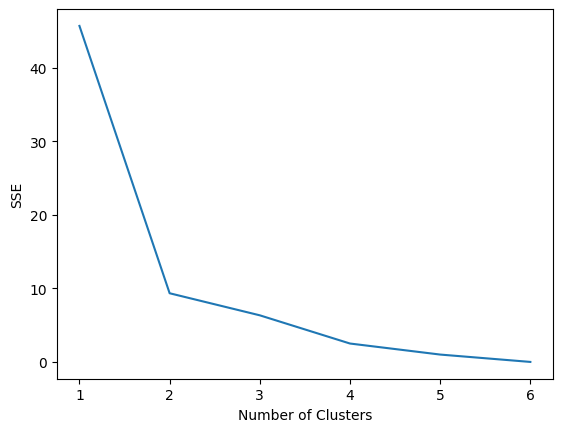

In [76]:
import matplotlib.pyplot as plt

numClusters = [1, 2, 3, 4, 5, 6]
SSE = []
for k in numClusters:
    k_means = cluster.KMeans(n_clusters=k)
    k_means.fit(data)
    SSE.append(k_means.inertia_)

plt.plot(numClusters, SSE)
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")

### 8.1.1 思考题

#### 8.1.1.1 Iris

Iris Dataset Shape: (150, 5)
   sepal_l  sepal_w  petal_l  petal_w      species
0      5.1      3.5      1.4      0.2  Iris-setosa
1      4.9      3.0      1.4      0.2  Iris-setosa
2      4.7      3.2      1.3      0.2  Iris-setosa
3      4.6      3.1      1.5      0.2  Iris-setosa
4      5.0      3.6      1.4      0.2  Iris-setosa

Clustering Results:
Cluster ID        0   1   2
Species                    
Iris-setosa       0  50   0
Iris-versicolor   3   0  47
Iris-virginica   36   0  14


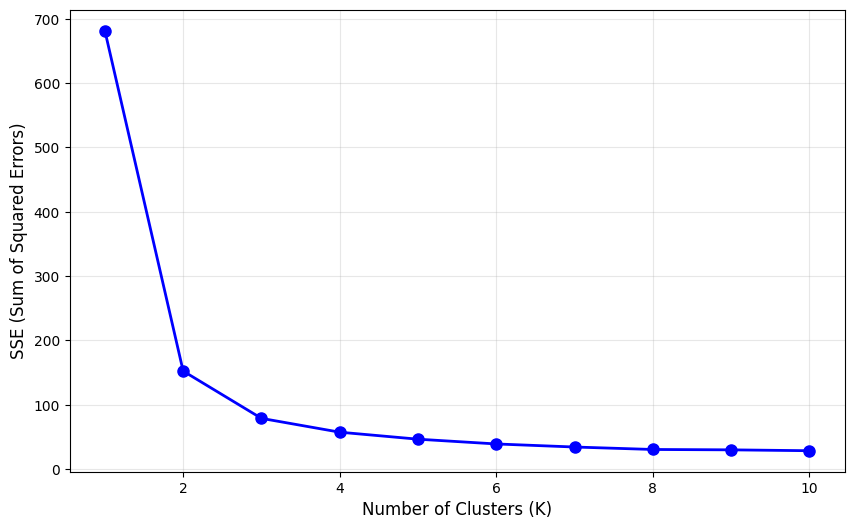

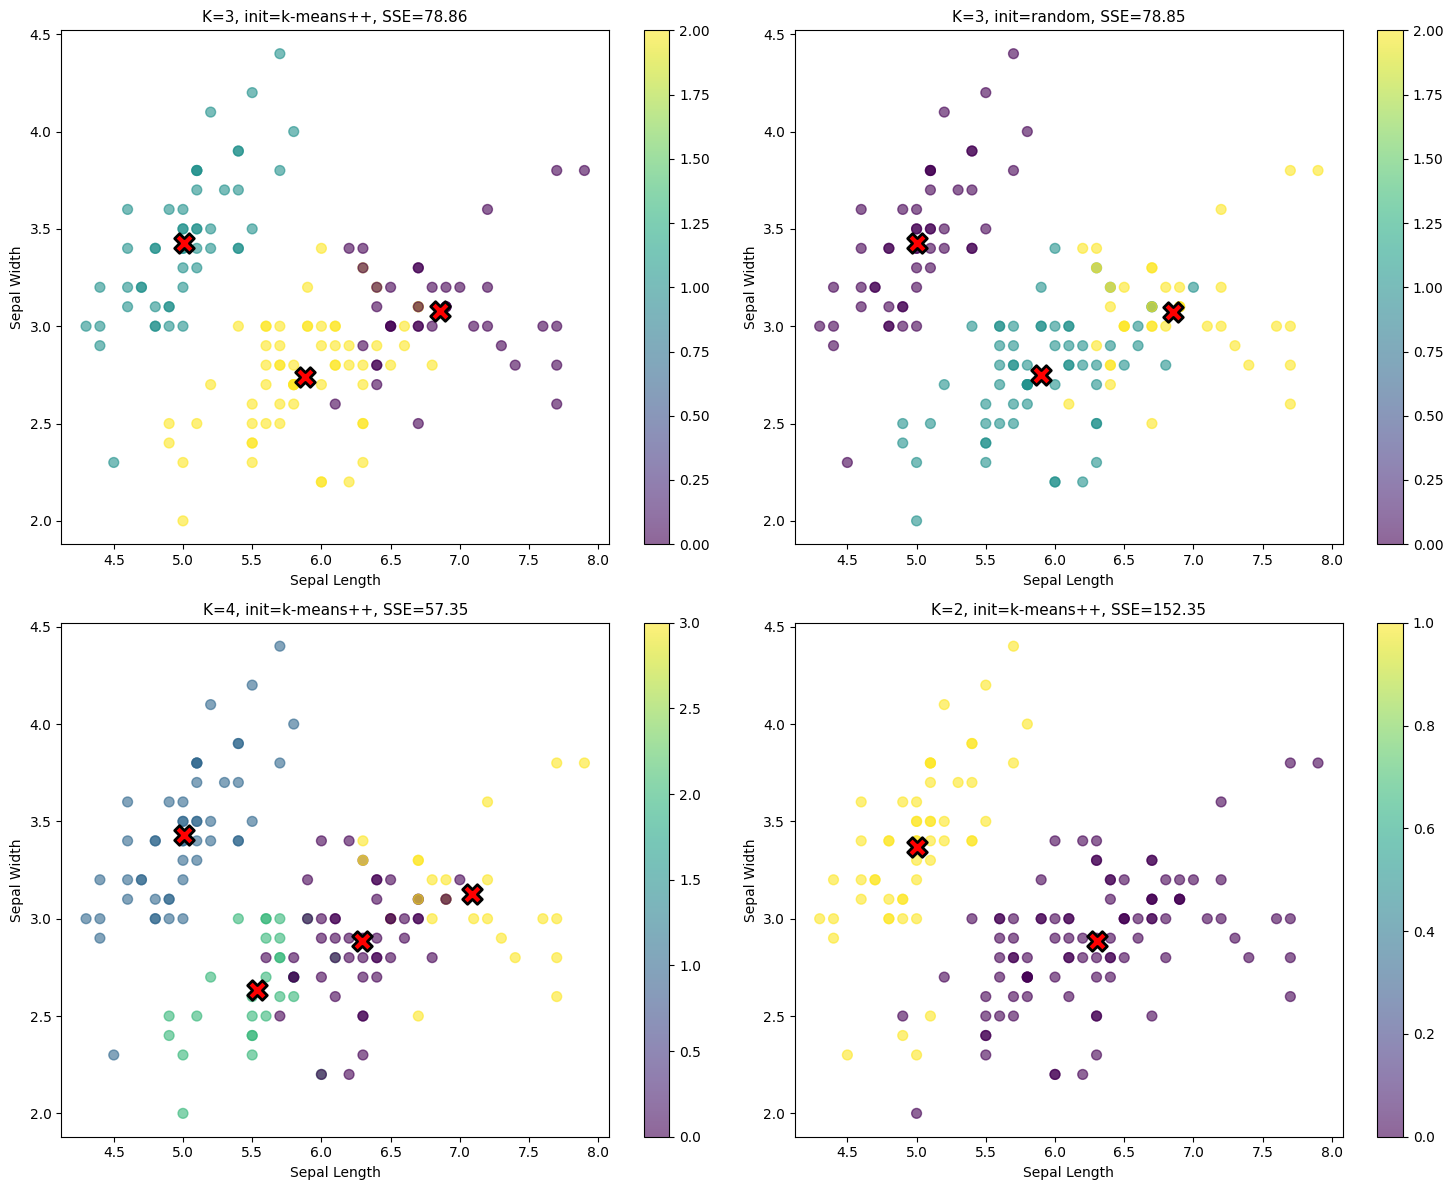

In [77]:
iris_data = pd.read_csv("iris.csv")
print("Iris Dataset Shape:", iris_data.shape)
print(iris_data.head())

X_iris = iris_data.drop("species", axis=1)
y_true = iris_data["species"]

k_means_iris = cluster.KMeans(n_clusters=3, random_state=42, max_iter=300)
k_means_iris.fit(X_iris)
labels_iris = k_means_iris.labels_

result_iris = pd.DataFrame({"Species": y_true, "Cluster ID": labels_iris})
print("\nClustering Results:")
print(result_iris.groupby(["Species", "Cluster ID"]).size().unstack(fill_value=0))

K_range = range(1, 11)
SSE_iris = []
for k in K_range:
    kmeans = cluster.KMeans(n_clusters=k, random_state=42, max_iter=300)
    kmeans.fit(X_iris)
    SSE_iris.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(K_range, SSE_iris, "bo-", linewidth=2, markersize=8)
plt.xlabel("Number of Clusters (K)", fontsize=12)
plt.ylabel("SSE (Sum of Squared Errors)", fontsize=12)
plt.grid(True, alpha=0.3)
plt.show()

fig, axes = plt.subplots(2, 2, figsize=(15, 12))
params = [
    (3, "k-means++", 100),
    (3, "random", 100),
    (4, "k-means++", 100),
    (2, "k-means++", 100),
]

for idx, (n_clusters, init, max_iter) in enumerate(params):
    ax = axes[idx // 2, idx % 2]
    kmeans = cluster.KMeans(
        n_clusters=n_clusters, init=init, max_iter=max_iter, random_state=42
    )
    kmeans.fit(X_iris)

    scatter = ax.scatter(
        X_iris.iloc[:, 0],
        X_iris.iloc[:, 1],
        c=kmeans.labels_,
        cmap="viridis",
        s=50,
        alpha=0.6,
    )
    ax.scatter(
        kmeans.cluster_centers_[:, 0],
        kmeans.cluster_centers_[:, 1],
        c="red",
        marker="X",
        s=200,
        edgecolors="black",
        linewidths=2,
    )
    ax.set_xlabel("Sepal Length", fontsize=10)
    ax.set_ylabel("Sepal Width", fontsize=10)
    ax.set_title(f"K={n_clusters}, init={init}, SSE={kmeans.inertia_:.2f}", fontsize=11)
    plt.colorbar(scatter, ax=ax)

plt.tight_layout()
plt.show()

#### 8.1.1.2 Breast cancer Wisconsin

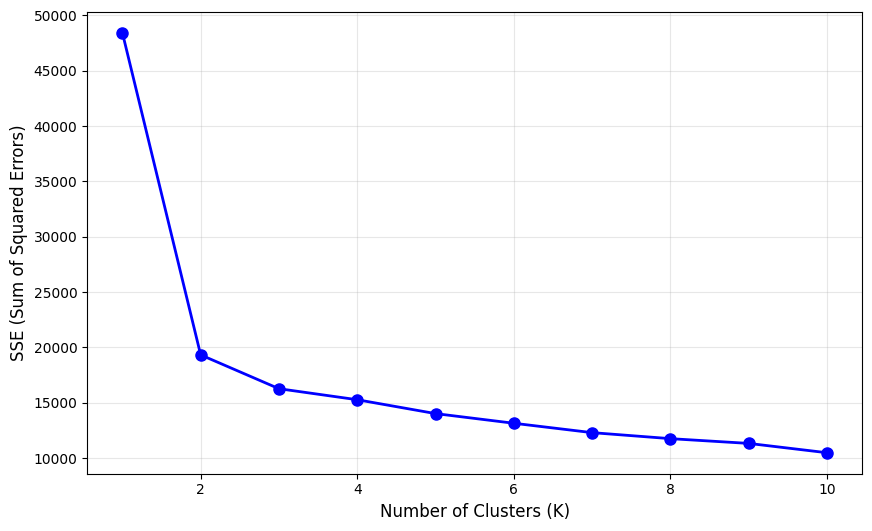

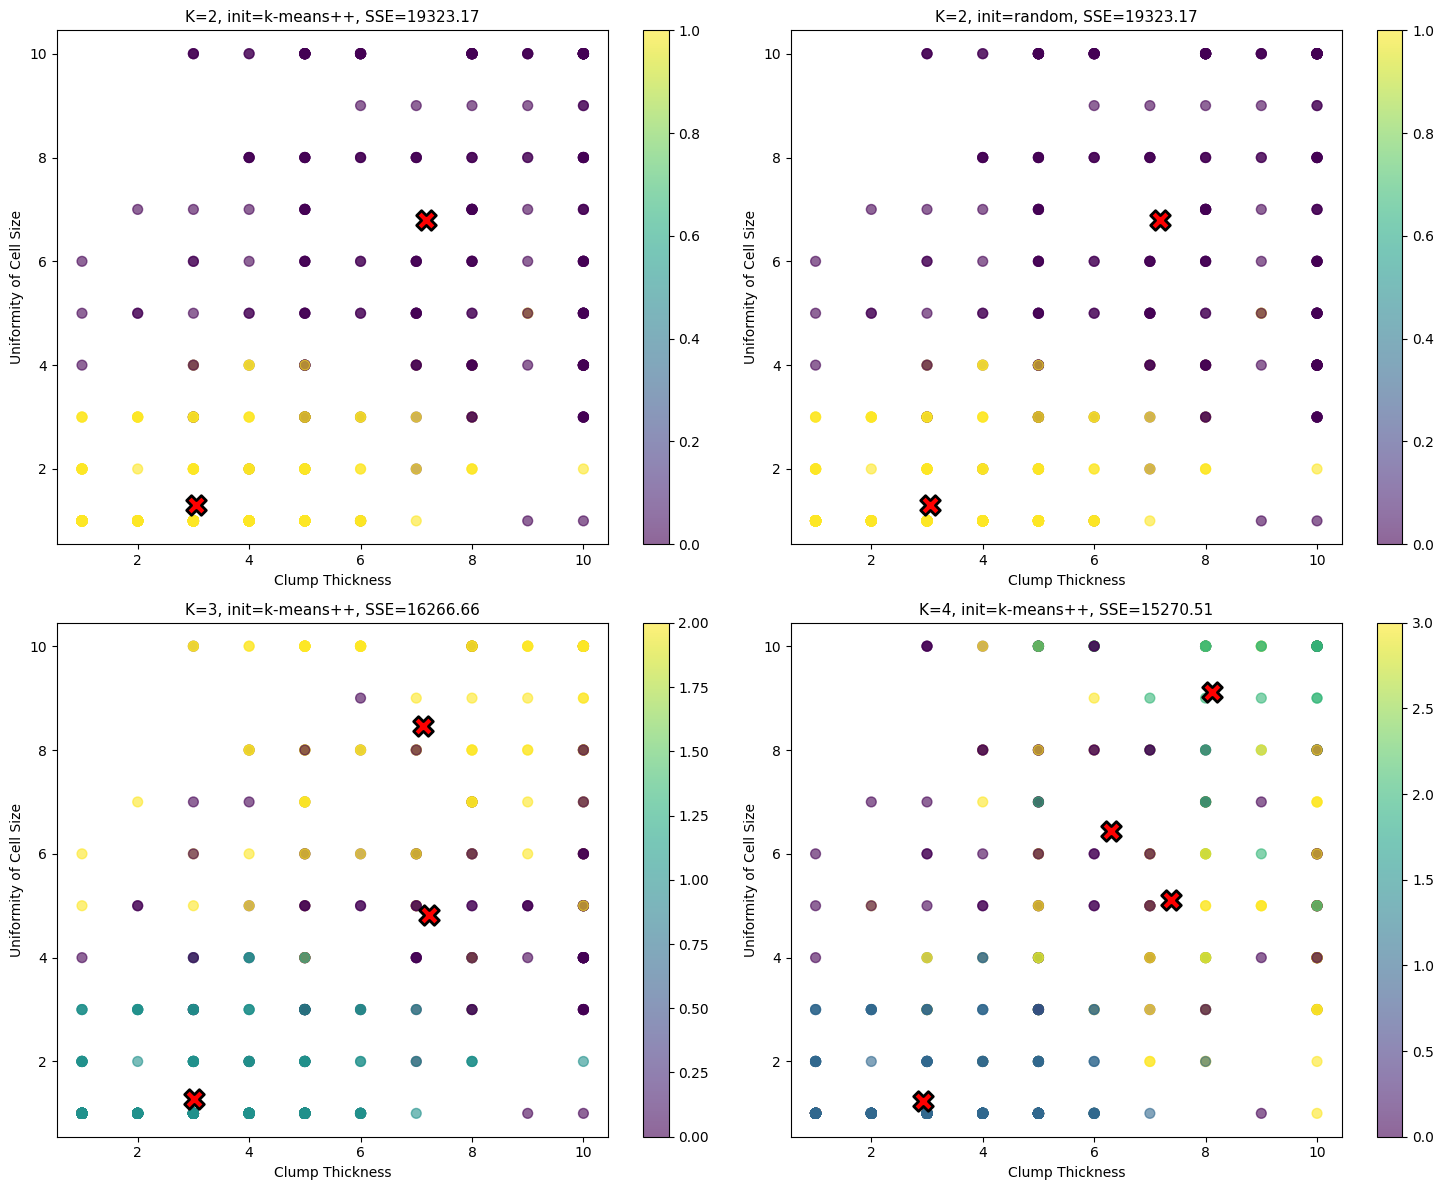

In [78]:
from sklearn.metrics import accuracy_score

cancer_data = pd.read_csv("breast-cancer-wisconsin.data", header=None)
column_names = [
    "ID",
    "Clump_Thickness",
    "Uniformity_Cell_Size",
    "Uniformity_Cell_Shape",
    "Marginal_Adhesion",
    "Single_Epithelial_Cell_Size",
    "Bare_Nuclei",
    "Bland_Chromatin",
    "Normal_Nucleoli",
    "Mitoses",
    "Class",
]
cancer_data.columns = column_names

cancer_data = cancer_data.replace("?", np.nan)
cancer_data = cancer_data.dropna()

X_cancer = cancer_data.drop(["ID", "Class"], axis=1)
X_cancer = X_cancer.astype(float)
y_true_cancer = cancer_data["Class"]

k_means_cancer = cluster.KMeans(n_clusters=2, random_state=42, max_iter=300)
k_means_cancer.fit(X_cancer)
labels_cancer = k_means_cancer.labels_

result_cancer = pd.DataFrame(
    {"True Class": y_true_cancer.values, "Cluster ID": labels_cancer}
)

adjusted_labels = np.where(labels_cancer == 0, 2, 4)
acc1 = accuracy_score(y_true_cancer, adjusted_labels)
adjusted_labels2 = np.where(labels_cancer == 0, 4, 2)
acc2 = accuracy_score(y_true_cancer, adjusted_labels2)

K_range = range(1, 11)
SSE_cancer = []
for k in K_range:
    kmeans = cluster.KMeans(n_clusters=k, random_state=42, max_iter=300)
    kmeans.fit(X_cancer)
    SSE_cancer.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(K_range, SSE_cancer, "bo-", linewidth=2, markersize=8)
plt.xlabel("Number of Clusters (K)", fontsize=12)
plt.ylabel("SSE (Sum of Squared Errors)", fontsize=12)
plt.grid(True, alpha=0.3)
plt.show()

fig, axes = plt.subplots(2, 2, figsize=(15, 12))
params = [
    (2, "k-means++", 100),
    (2, "random", 100),
    (3, "k-means++", 100),
    (4, "k-means++", 100),
]

for idx, (n_clusters, init, max_iter) in enumerate(params):
    ax = axes[idx // 2, idx % 2]
    kmeans = cluster.KMeans(
        n_clusters=n_clusters, init=init, max_iter=max_iter, random_state=42
    )
    kmeans.fit(X_cancer)

    scatter = ax.scatter(
        X_cancer.iloc[:, 0],
        X_cancer.iloc[:, 1],
        c=kmeans.labels_,
        cmap="viridis",
        s=50,
        alpha=0.6,
    )
    ax.scatter(
        kmeans.cluster_centers_[:, 0],
        kmeans.cluster_centers_[:, 1],
        c="red",
        marker="X",
        s=200,
        edgecolors="black",
        linewidths=2,
    )
    ax.set_xlabel("Clump Thickness", fontsize=10)
    ax.set_ylabel("Uniformity of Cell Size", fontsize=10)
    ax.set_title(f"K={n_clusters}, init={init}, SSE={kmeans.inertia_:.2f}", fontsize=11)
    plt.colorbar(scatter, ax=ax)

plt.tight_layout()
plt.show()

## 8.2 层次聚类 Hierarchical Clustering

本节演示将层次聚类应用于模块6（分类）中使用的脊椎动物数据集的示例。 具体来说，我们说明了使用Python scipy库提供的3种层次聚类算法的结果：（1）单链接（MIN），（2）全链接（MAX）和（3）组平均值（group average）。 该库还提供了一些其他分层聚类算法，包括基于质心（centroid-based）和Ward方法。

**<font color ='red'>任务：</font>** 
1. 运行下述代码，查阅文档资料并结合聚类结果对比分析三种算法的原理和效果；
2. 查阅scipy文档，尝试使用基于质心（centroid-based）和Ward方法，观察实验结果并分析这两类算法的原理。

**<font color ='red'>思考：</font>** 
1. 结合你的生物知识，分析五种算法的结果是否符合你对生物分类体系的理解；
2. 对比五种算法的结果的异同，并结合其工作原理分析原因。

In [79]:
import pandas as pd

data = pd.read_csv("vertebrate.csv", header="infer")
data

,Name,Warm-blooded,Gives Birth,Aquatic Creature,Aerial Creature,Has Legs,Hibernates,Class
0,human,1,1,0,0,1,0,mammals
1,python,0,0,0,0,0,1,reptiles
2,salmon,0,0,1,0,0,0,fishes
3,whale,1,1,1,0,0,0,mammals
4,frog,0,0,1,0,1,1,amphibians
5,komodo,0,0,0,0,1,0,reptiles
6,bat,1,1,0,1,1,1,mammals
7,pigeon,1,0,0,1,1,0,birds
8,cat,1,1,0,0,1,0,mammals
9,leopard shark,0,1,1,0,0,0,fishes


### 8.2.1 单链接 (MIN)

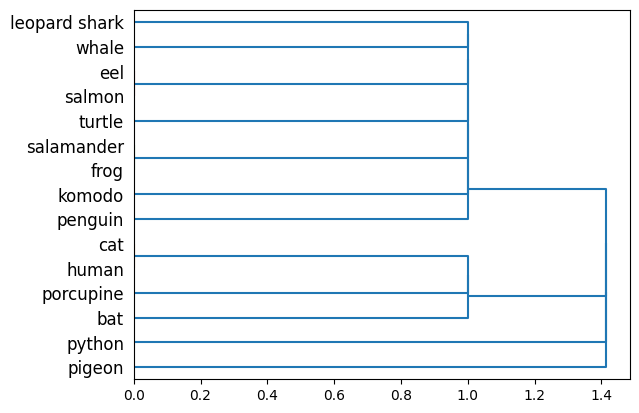

In [80]:
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt

names = data["Name"]
Y = data["Class"]
X = data.drop(["Name", "Class"], axis=1)
# NDFrame.as_matrix is deprecated. Use NDFrame.values instead (:issue:18458).
# Z = hierarchy.linkage(X.as_matrix(), 'single')
Z = hierarchy.linkage(X.values, "single")
dn = hierarchy.dendrogram(Z, labels=names.tolist(), orientation="right")

### 8.2.2 全链接 (MAX)

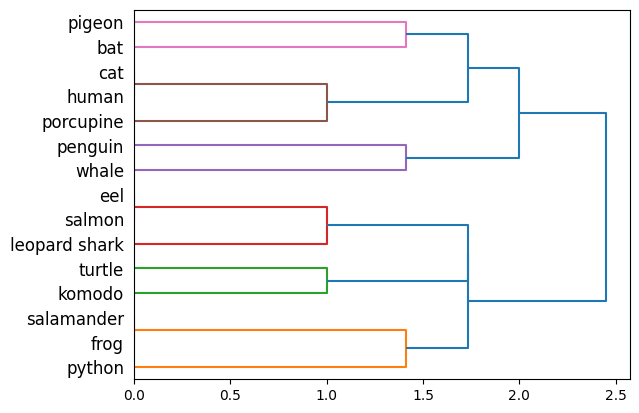

In [81]:
Z = hierarchy.linkage(X.values, "complete")
dn = hierarchy.dendrogram(Z, labels=names.tolist(), orientation="right")

### 8.2.3 组平均值 Group Average

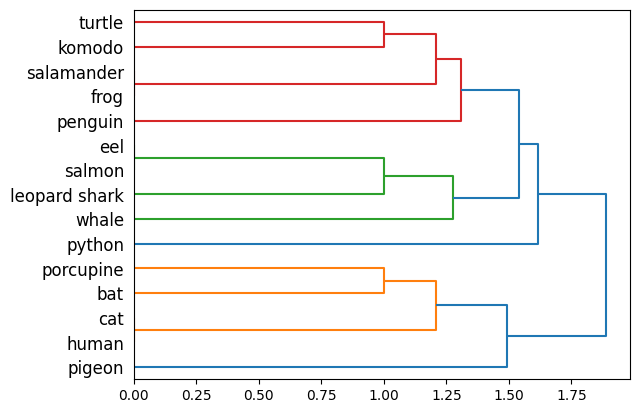

In [82]:
Z = hierarchy.linkage(X.values, "average")
dn = hierarchy.dendrogram(Z, labels=names.tolist(), orientation="right")

### 8.2.4 任务与思考题

#### 8.2.4.1 质心法

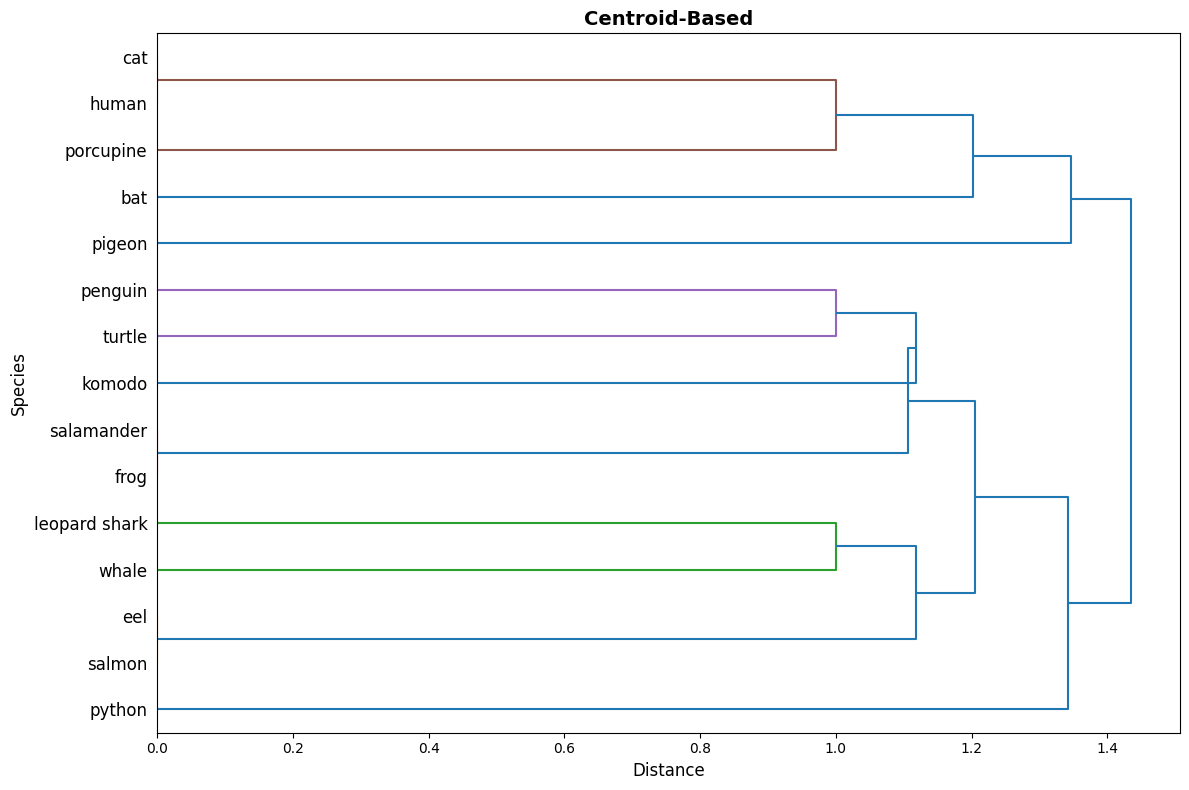

In [83]:
data = pd.read_csv("vertebrate.csv", header="infer")
names = data["Name"]
Y = data["Class"]
X = data.drop(["Name", "Class"], axis=1)

Z_centroid = hierarchy.linkage(X.values, "centroid")

plt.figure(figsize=(12, 8))
dn = hierarchy.dendrogram(Z_centroid, labels=names.tolist(), orientation="right")
plt.title("Centroid-Based", fontsize=14, fontweight='bold')
plt.xlabel("Distance", fontsize=12)
plt.ylabel("Species", fontsize=12)
plt.tight_layout()
plt.show()

#### 8.2.4.2 Ward法

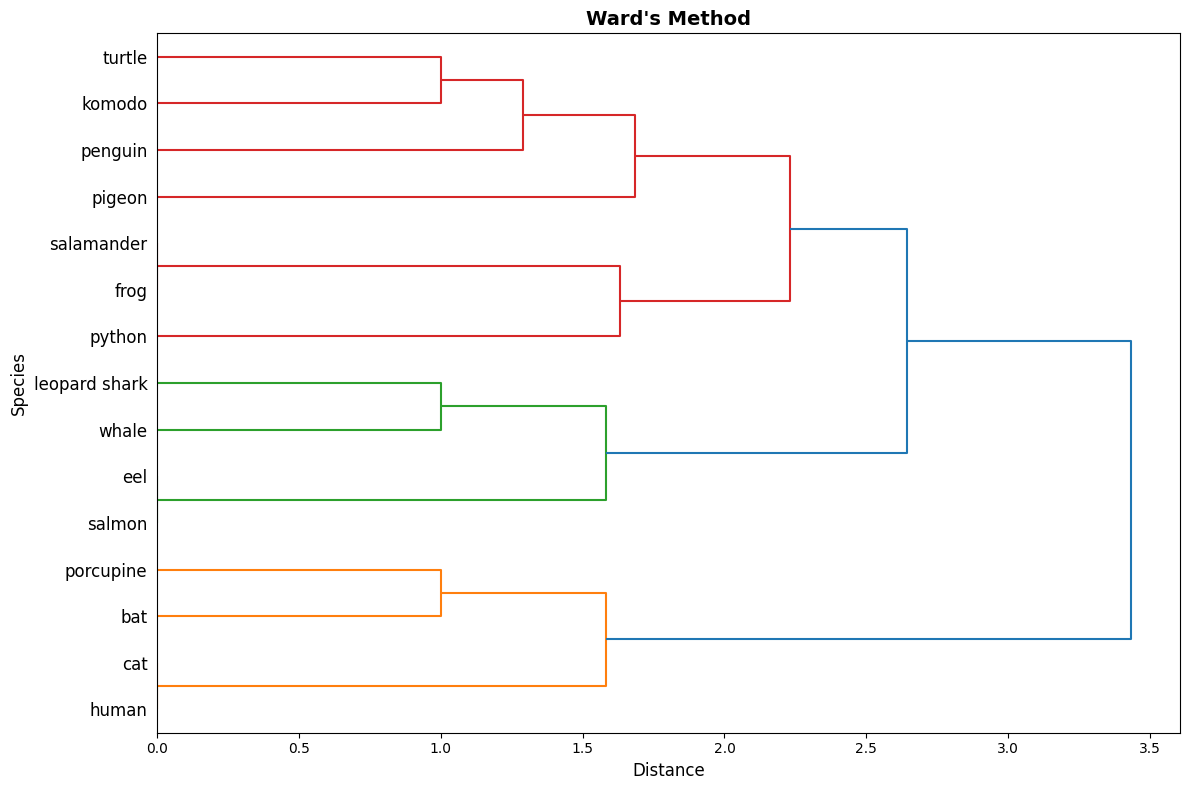

In [84]:
Z_ward = hierarchy.linkage(X.values, "ward")

plt.figure(figsize=(12, 8))
dn = hierarchy.dendrogram(Z_ward, labels=names.tolist(), orientation="right")
plt.title("Ward's Method", fontsize=14, fontweight='bold')
plt.xlabel("Distance", fontsize=12)
plt.ylabel("Species", fontsize=12)
plt.tight_layout()
plt.show()

## 8.3 基于密度的聚类 Density-Based Clustering

基于密度的聚类方法将各个簇标识为被低密度区域分隔的高密度区域。 DBScan是最流行的基于密度的聚类算法之一。 在DBScan中，数据点根据其局部邻域的密度（density of their local neighborhood）分为三类-核心点（core points），边界点（border points）和噪声点（noise points）。 局部邻域密度是根据以下两个参数定义的：邻域大小的半径（eps）和邻域中的最小点数（min_samples）。

对于这种方法，我们将使用由Karypis等人[1]最初创建的包含噪声的二维数据集评估他们提出的CHAMELEON算法。下面显示的示例代码将加载并绘制数据分布。

**<font color ='red'>任务：</font>** 
1. 运行下述代码，查阅文档资料并结合聚类结果对比分析不同算法的原理和效果；
2. 查阅scipy文档，尝试修改各个算法的超参数，并观察其对实验结果的影响。

**<font color ='red'>思考：</font>** 
1. 查阅scikit-learn文档中的数据生成器（Samples generator，https://scikit-learn.org/stable/modules/classes.html#module-sklearn.datasets ）请至少生成5种不同（形状或者分布）的数据集，并使用DBScan和谱聚类进行聚类分析，观察实验结果，结合算法原理进行分析。


<Axes: xlabel='x', ylabel='y'>

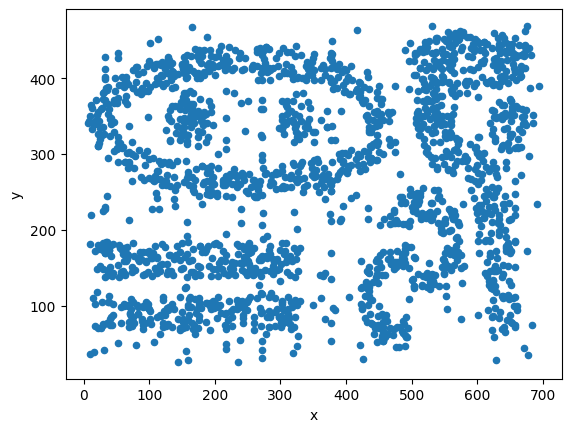

In [85]:
import pandas as pd

data = pd.read_csv("chameleon.data", delimiter=" ", names=["x", "y"])
data.plot.scatter(x="x", y="y")

通过将邻域半径（eps）设置为15.5，将最小点数（min_samples）设置为5，我们对数据应用DBScan聚类算法。将簇分配给0到8之间的ID，而将噪声点分配给ID为-1的簇。

<Axes: xlabel='x', ylabel='y'>

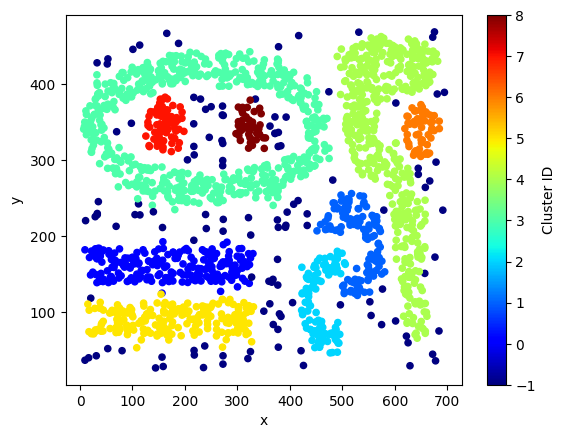

In [86]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=15.5, min_samples=5).fit(data)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = pd.DataFrame(db.labels_, columns=["Cluster ID"])
result = pd.concat((data, labels), axis=1)
result.plot.scatter(x="x", y="y", c="Cluster ID", colormap="jet")

### 8.3.1 任务与思考题

#### 8.3.1.1 任务

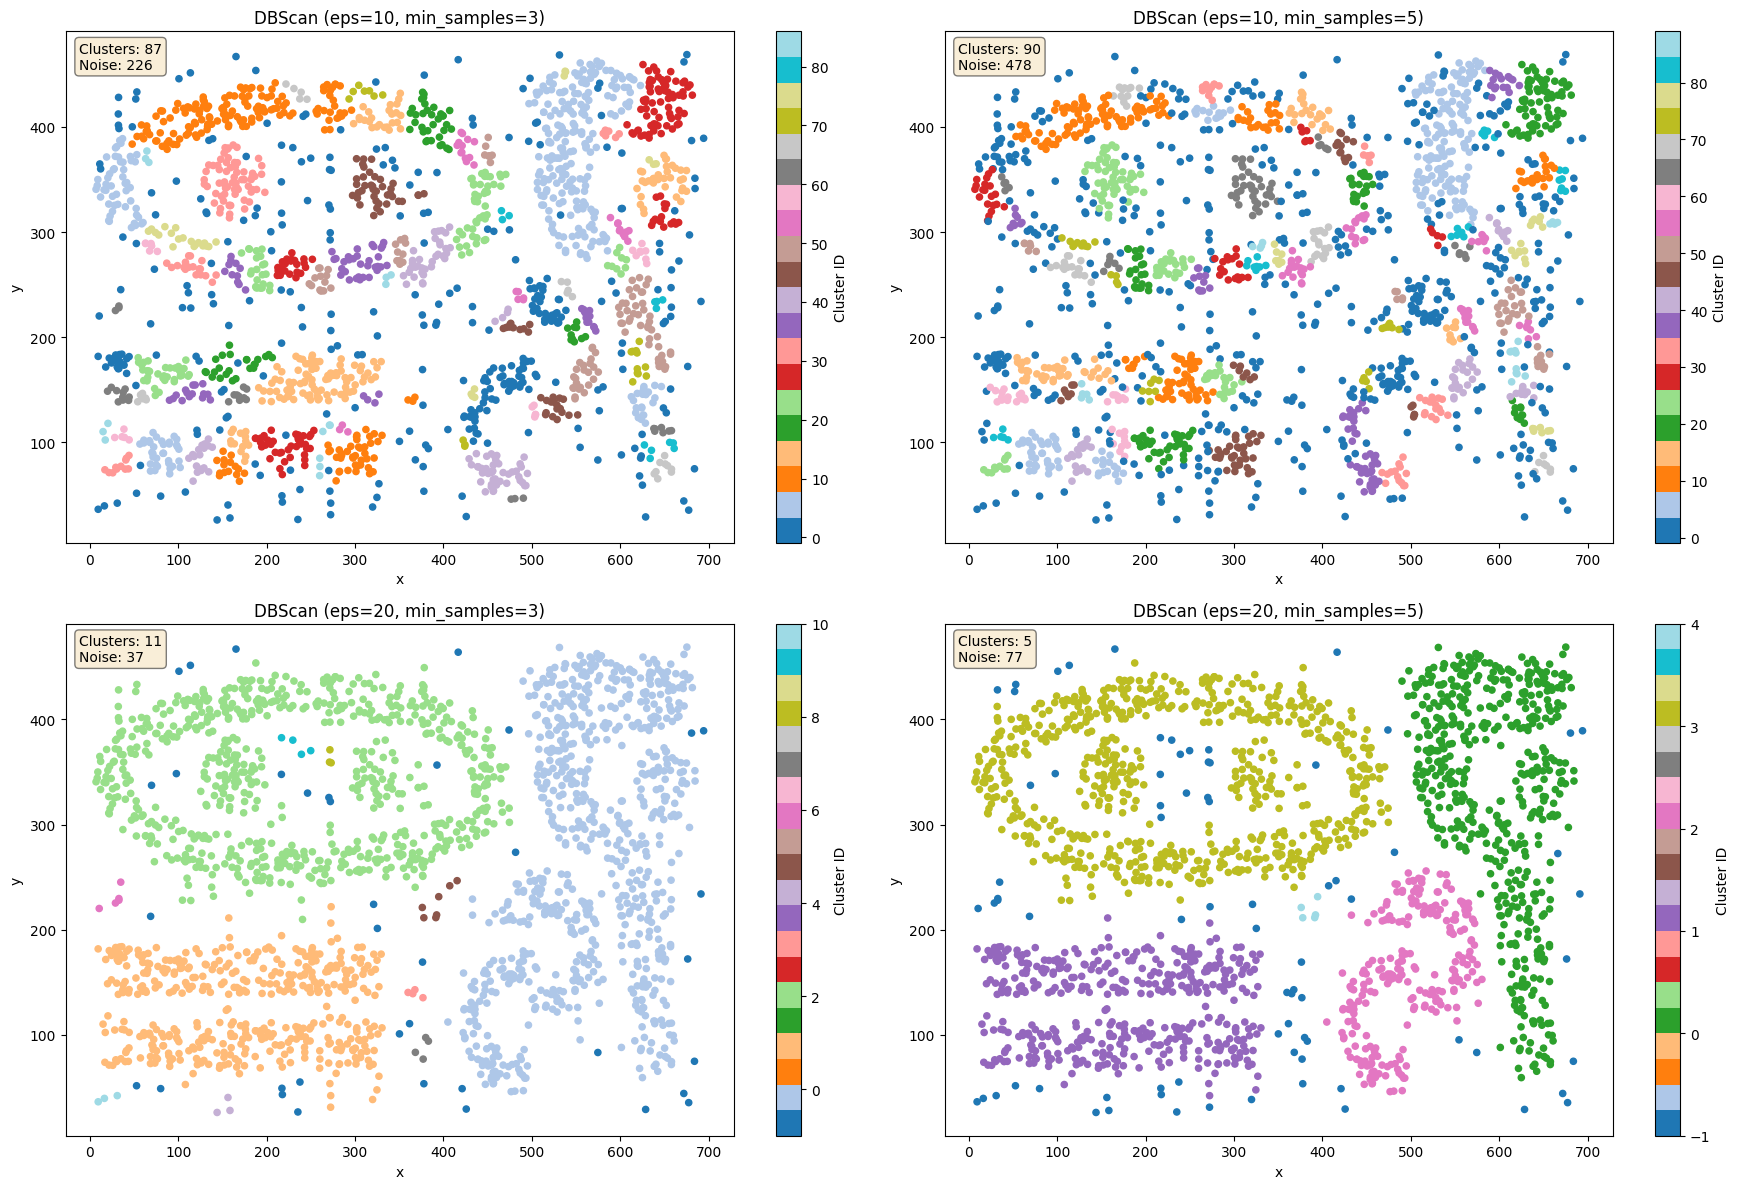

In [87]:
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
params = [(10, 3), (10, 5), (20, 3), (20, 5)]

for idx, (eps, min_samples) in enumerate(params):
    ax = axes[idx // 2, idx % 2]
    db = DBSCAN(eps=eps, min_samples=min_samples).fit(data)
    labels = pd.DataFrame(db.labels_, columns=["Cluster ID"])
    result = pd.concat((data, labels), axis=1)
    result.plot.scatter(x="x", y="y", c="Cluster ID", colormap="tab20", ax=ax)
    ax.set_title(f"DBScan (eps={eps}, min_samples={min_samples})")
    n_clusters = len(set(db.labels_)) - (1 if -1 in db.labels_ else 0)
    n_noise = list(db.labels_).count(-1)
    ax.text(
        0.02,
        0.98,
        f"Clusters: {n_clusters}\nNoise: {n_noise}",
        transform=ax.transAxes,
        verticalalignment="top",
        bbox=dict(boxstyle="round", facecolor="wheat", alpha=0.5),
    )

plt.tight_layout()
plt.show()

#### 8.3.1.2 思考题

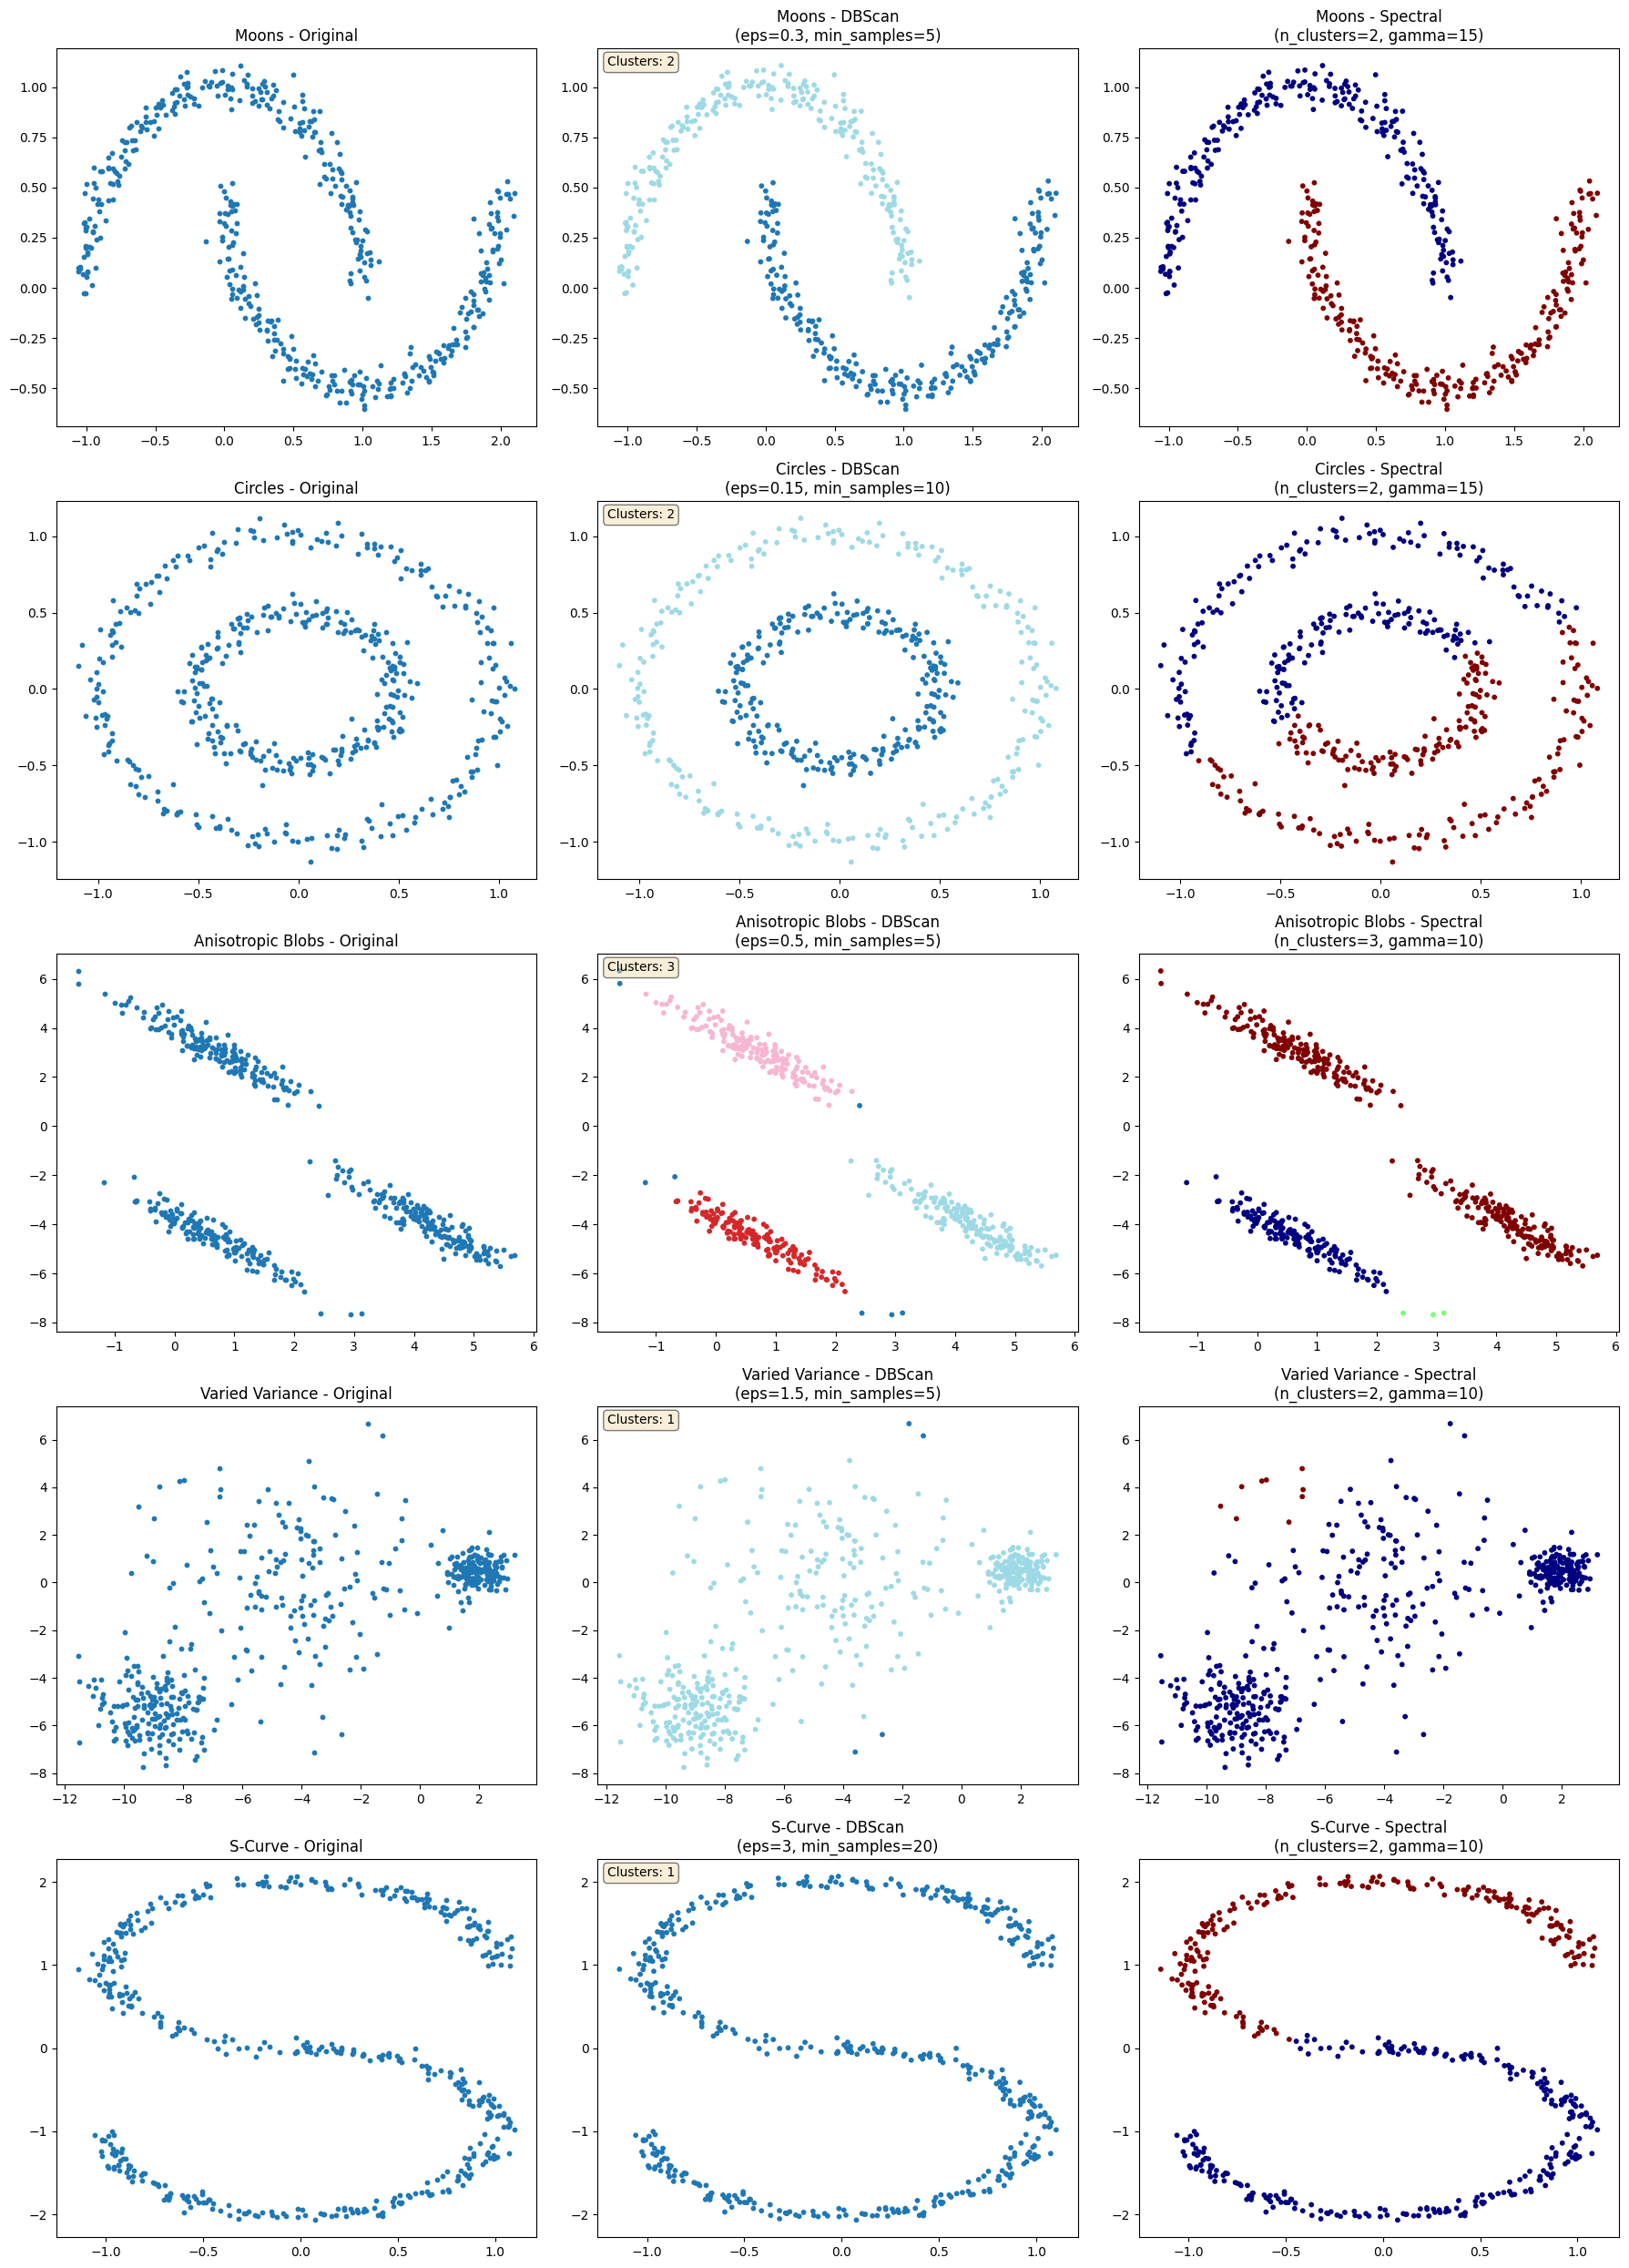

In [88]:
from sklearn import datasets
from sklearn.cluster import SpectralClustering

np.random.seed(0x0D000721)

moons, _ = datasets.make_moons(n_samples=500, noise=0.05)
circles, _ = datasets.make_circles(n_samples=500, noise=0.05, factor=0.5)
X, _ = datasets.make_blobs(n_samples=500, random_state=8)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
aniso = np.dot(X, transformation)
varied, _ = datasets.make_blobs(
    n_samples=500, cluster_std=[1.0, 2.5, 0.5], random_state=170
)
s_curve, _ = datasets.make_s_curve(n_samples=500, noise=0.05, random_state=42)
s_curve_2d = s_curve[:, [0, 2]]

datasets_list = [
    (moons, "Moons", 15, 0.3, 5),
    (circles, "Circles", 15, 0.15, 10),
    (aniso, "Anisotropic Blobs", 10, 0.5, 5),
    (varied, "Varied Variance", 10, 1.5, 5),
    (s_curve_2d, "S-Curve", 10, 3, 20),
]

fig, axes = plt.subplots(5, 3, figsize=(18, 25))

for idx, (X, name, gamma, eps, min_samples) in enumerate(datasets_list):
    axes[idx, 0].scatter(X[:, 0], X[:, 1], s=10)
    axes[idx, 0].set_title(f"{name} - Original")

    db = DBSCAN(eps=eps, min_samples=min_samples).fit(X)
    axes[idx, 1].scatter(X[:, 0], X[:, 1], c=db.labels_, cmap="tab20", s=10)
    axes[idx, 1].set_title(f"{name} - DBScan\n(eps={eps}, min_samples={min_samples})")
    n_clusters_db = len(set(db.labels_)) - (1 if -1 in db.labels_ else 0)
    axes[idx, 1].text(
        0.02,
        0.98,
        f"Clusters: {n_clusters_db}",
        transform=axes[idx, 1].transAxes,
        verticalalignment="top",
        bbox=dict(boxstyle="round", facecolor="wheat", alpha=0.5),
    )

    n_clusters = max(2, n_clusters_db)
    spectral = SpectralClustering(
        n_clusters=n_clusters, affinity="rbf", gamma=gamma, random_state=42
    )
    spec_labels = spectral.fit_predict(X)
    axes[idx, 2].scatter(X[:, 0], X[:, 1], c=spec_labels, cmap="jet", s=10)
    axes[idx, 2].set_title(
        f"{name} - Spectral\n(n_clusters={n_clusters}, gamma={gamma})"
    )

plt.tight_layout()
plt.show()

## 8.4 谱聚类 Spectral Clustering

K均值聚类算法的主要局限之一是其寻求球状簇的趋势。因此，针对具有任意形状的簇的数据集或簇的质心彼此重叠时，K均值聚类算法效果较差。 谱聚类可以通过利用相似度图的属性来克服这种限制，从而克服这种限制。为了说明这一点，请考虑以下二维数据集。

<Axes: xlabel='x', ylabel='y'>

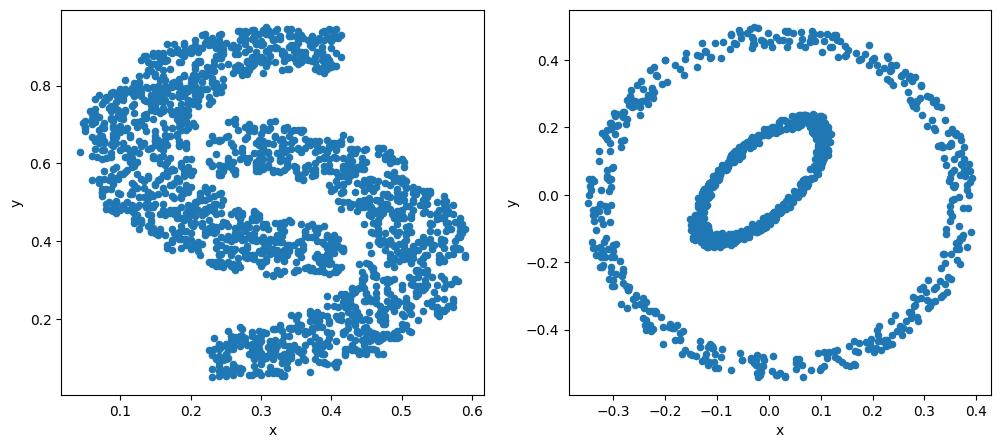

In [89]:
import pandas as pd

data1 = pd.read_csv("2d_data.txt", delimiter=" ", names=["x", "y"])
data2 = pd.read_csv("elliptical.txt", delimiter=" ", names=["x", "y"])

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
data1.plot.scatter(x="x", y="y", ax=ax1)
data2.plot.scatter(x="x", y="y", ax=ax2)

下面，我们演示将k均值应用于数据集（k = 2）的结果。

Text(0.5, 1.0, 'K-means Clustering')

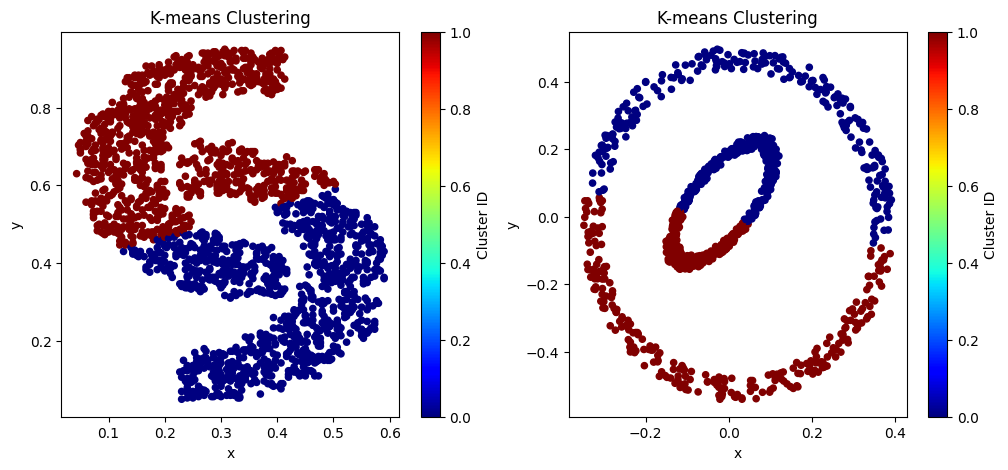

In [90]:
from sklearn import cluster

k_means = cluster.KMeans(n_clusters=2, max_iter=50, random_state=1)
k_means.fit(data1)
labels1 = pd.DataFrame(k_means.labels_, columns=["Cluster ID"])
result1 = pd.concat((data1, labels1), axis=1)

k_means2 = cluster.KMeans(n_clusters=2, max_iter=50, random_state=1)
k_means2.fit(data2)
labels2 = pd.DataFrame(k_means2.labels_, columns=["Cluster ID"])
result2 = pd.concat((data2, labels2), axis=1)

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
result1.plot.scatter(x="x", y="y", c="Cluster ID", colormap="jet", ax=ax1)
ax1.set_title("K-means Clustering")
result2.plot.scatter(x="x", y="y", c="Cluster ID", colormap="jet", ax=ax2)
ax2.set_title("K-means Clustering")

上图显示了k均值聚类的性能较差。 接下来，我们将谱聚类应用于数据集。 谱聚类将数据转换为相似度图，并应用归一化切割图分区算法（normalized cut graph partitioning algorithm）生成簇。 在下面的示例中，我们将高斯径向基函数（Gaussian radial basis function）用作我们的亲和度（affinity，类似于相似度）度量。 用户需要调整内核参数（gamma）值，以获得针对给定数据集的合适的簇。

Text(0.5, 1.0, 'Spectral Clustering')

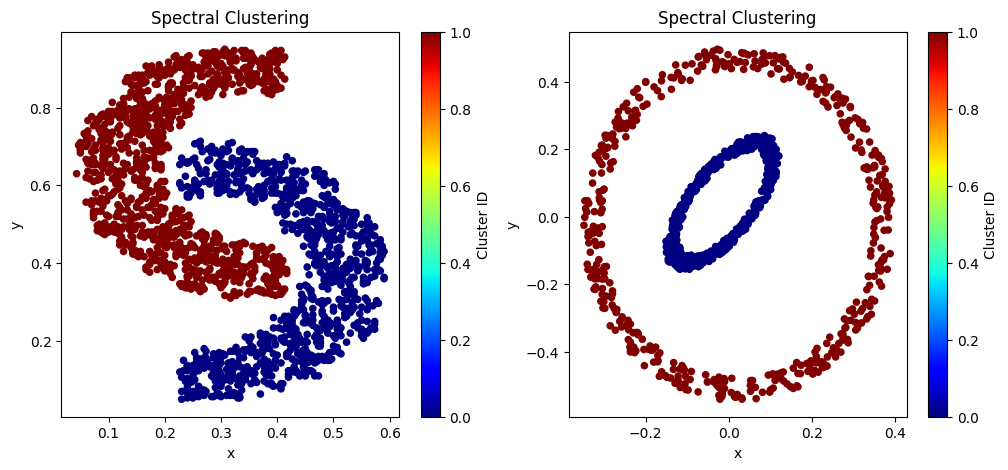

In [91]:
from sklearn import cluster
import pandas as pd

spectral = cluster.SpectralClustering(
    n_clusters=2, random_state=1, affinity="rbf", gamma=5000
)
spectral.fit(data1)
labels1 = pd.DataFrame(spectral.labels_, columns=["Cluster ID"])
result1 = pd.concat((data1, labels1), axis=1)

spectral2 = cluster.SpectralClustering(
    n_clusters=2, random_state=1, affinity="rbf", gamma=500
)
spectral2.fit(data2)
labels2 = pd.DataFrame(spectral2.labels_, columns=["Cluster ID"])
result2 = pd.concat((data2, labels2), axis=1)

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
result1.plot.scatter(x="x", y="y", c="Cluster ID", colormap="jet", ax=ax1)
ax1.set_title("Spectral Clustering")
result2.plot.scatter(x="x", y="y", c="Cluster ID", colormap="jet", ax=ax2)
ax2.set_title("Spectral Clustering")

## 8.5 总结 Summary

本教程说明了使用不同的Python聚类算法实现的示例。 k均值、谱聚类和DBScan之类的算法旨在创建数据的不相交分区，而单链接，完全链接和组平均算法则旨在生成簇的层次结构。

参考文献：
[1] George Karypis, Eui-Hong Han, and Vipin Kumar. CHAMELEON: A Hierarchical Clustering Algorithm Using Dynamic Modeling. IEEE Computer 32(8): 68-75, 1999.